In [29]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

[[1.00e+00 4.00e+00 1.20e-01 5.35e+02]
 [1.00e+00 5.00e+00 1.30e-01 5.10e+02]
 [1.00e+00 5.00e+00 1.40e-01 4.96e+02]
 [1.00e+00 7.00e+00 2.00e-01 4.89e+02]
 [1.00e+00 8.00e+00 2.20e-01 4.53e+02]
 [1.00e+00 8.00e+00 2.30e-01 4.12e+02]
 [1.00e+00 9.00e+00 2.30e-01 3.78e+02]
 [1.00e+00 1.10e+01 3.00e-01 3.19e+02]
 [1.00e+00 1.10e+01 3.10e-01 2.78e+02]
 [1.00e+00 1.20e+01 3.40e-01 2.56e+02]
 [1.00e+00 1.30e+01 3.50e-01 2.12e+02]
 [1.00e+00 1.40e+01 3.90e-01 1.89e+02]
 [1.00e+00 1.60e+01 4.20e-01 1.45e+02]
 [1.00e+00 1.80e+01 4.30e-01 1.20e+02]
 [1.00e+00 1.90e+01 4.80e-01 8.90e+01]
 [1.00e+00 1.90e+01 5.10e-01 6.80e+01]
 [1.00e+00 2.10e+01 5.20e-01 6.70e+01]
 [1.00e+00 2.20e+01 5.30e-01 5.60e+01]
 [1.00e+00 2.50e+01 5.60e-01 4.50e+01]
 [1.00e+00 2.70e+01 6.00e-01 3.20e+01]]
(20, 4)
[[21.]
 [24.]
 [27.]
 [30.]
 [29.]
 [31.]
 [32.]
 [33.]
 [36.]
 [37.]
 [41.]
 [37.]
 [40.]
 [39.]
 [41.]
 [42.]
 [44.]
 [45.]
 [45.]
 [48.]]
(20, 1)


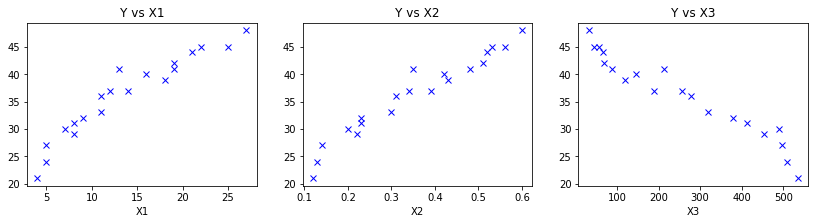

In [133]:
data_train = np.zeros((4,20))
data_train[0] = [4, 5, 5, 7, 8, 8, 9, 11, 11, 12, 13, 14, 16, 18, 19, 19, 21, 22, 25, 27] #x1
data_train[1] = [0.12, 0.13, 0.14, 0.20, 0.22, 0.23, 0.23, 0.30, 0.31, 0.34, 0.35, 0.39, 0.42, 0.43, 0.48, 0.51, 0.52, 0.53, 0.56, 0.60] #x2
data_train[2] = [535, 510, 496, 489, 453, 412, 378, 319, 278, 256, 212, 189, 145, 120, 89, 68, 67, 56, 45, 32] #x3
data_train[3] = [21, 24, 27, 30, 29, 31, 32, 33, 36, 37, 41, 37, 40, 39, 41, 42, 44, 45, 45, 48] #y

data_X = np.ones((4,20))
data_X[1:4] = data_train[0:3]
data_X = data_X.T
print data_X
print data_X.shape

data_Y = data_train[3,0:]
data_Y = data_Y.reshape(20,1)
print data_Y
print data_Y.shape

plt.figure(figsize=(14,3))

plt.subplot(131)
plt.title('Y vs X1')
plt.xlabel('X1')
plt.plot(data_X[0:,1], data_Y, 'bx')

plt.subplot(132)
plt.title('Y vs X2')
plt.xlabel('X2')
plt.plot(data_X[0:,2], data_Y, 'bx')

plt.subplot(133)
plt.title('Y vs X3')
plt.xlabel('X3')
plt.plot(data_X[0:,3], data_Y, 'bx')

plt.show();

In [182]:
# Feature scaling

feature_means = np.mean(data_X, axis=0)
feature_stds = np.std(data_X, axis=0)

data_X_scaled = np.ones((20,4))
array_means = np.tile(feature_means,(20,1))
array_stds = np.tile(feature_stds,(20,1))

data_X_scaled[0:,1:4] = (data_X[0:,1:4]-array_means[0:,1:4]) / array_stds[0:,1:4]
print data_X_scaled

[[ 1.         -1.44422654 -1.55210058  1.5924099 ]
 [ 1.         -1.2953372  -1.48476433  1.4489754 ]
 [ 1.         -1.2953372  -1.41742807  1.36865207]
 [ 1.         -0.99755854 -1.01341057  1.32849041]
 [ 1.         -0.8486692  -0.87873807  1.12194472]
 [ 1.         -0.8486692  -0.81140182  0.88671213]
 [ 1.         -0.69977987 -0.81140182  0.6916412 ]
 [ 1.         -0.4020012  -0.34004807  0.35313576]
 [ 1.         -0.4020012  -0.27271181  0.11790317]
 [ 1.         -0.25311187 -0.07070306 -0.0083192 ]
 [ 1.         -0.10422253 -0.00336681 -0.26076393]
 [ 1.          0.0446668   0.26597819 -0.39272368]
 [ 1.          0.34244547  0.46798694 -0.64516842]
 [ 1.          0.64022413  0.53532319 -0.78860292]
 [ 1.          0.78911347  0.87200445 -0.96646171]
 [ 1.          0.78911347  1.0740132  -1.0869467 ]
 [ 1.          1.08689214  1.14134945 -1.09268408]
 [ 1.          1.23578147  1.2086857  -1.15579526]
 [ 1.          1.68244947  1.41069445 -1.21890645]
 [ 1.          1.98022814  1.68

In [261]:
# Normal equation


true_params = np.dot(np.dot(np.linalg.pinv(np.dot(data_X_scaled.T, data_X_scaled)),data_X_scaled.T), data_Y)
print true_params

y_pred = make_prediction(true_params, data_X_scaled)
print y_pred




[[36.1       ]
 [-0.91762038]
 [ 5.56269974]
 [-2.46764019]]
[[24.86188755]
 [25.45377976]
 [26.02656017]
 [28.09984499]
 [29.22204424]
 [30.17708498]
 [30.52182596]
 [33.70588722]
 [34.66092796]
 [35.95948949]
 [36.82037972]
 [38.50767038]
 [39.98107941]
 [40.43634774]
 [42.61147207]
 [44.03249969]
 [44.14798105]
 [44.5416642 ]
 [45.41124226]
 [46.82033114]]


X training data is 20x4
Y is 20x1
Y predicted has to be 20x1
Y pred (20x1) = X training (20x4) * Params (4x1)

In [203]:
def make_prediction(params,X):
    y = np.dot(X, params)
    return y

In [217]:
params=np.zeros((4,1))
print params
y_pred = make_prediction(params, data_X_scaled)
print y_pred


[[0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [43]:
def compute_cost(y, y_predicted):
    squared_differences = [data**2 for data in (y-y_predicted)]
    cost = sum(squared_differences) / float(len(y))   
    return cost

In [101]:
y_test = make_prediction(params, data_X)
cost = compute_cost(data_train[3].T, y_test)
print cost
print data_train[3].T
print y_test

[1545614.394145 1539393.885145 1533191.376145 1527006.867145
 1529066.370145 1524949.364145 1522893.861145 1520840.358145
 1514691.849145 1512646.346145 1504484.334145 1512646.346145
 1506521.837145 1508561.340145 1504484.334145 1502448.831145
 1498383.825145 1496354.322145 1496354.322145 1490277.813145]
[21. 24. 27. 30. 29. 31. 32. 33. 36. 37. 41. 37. 40. 39. 41. 42. 44. 45.
 45. 48.]
[[2149.36]
 [2051.39]
 [1995.42]
 [1971.6 ]
 [1829.66]
 [1665.69]
 [1531.69]
 [1299.9 ]
 [1135.93]
 [1050.02]
 [ 876.05]
 [ 786.17]
 [ 614.26]
 [ 518.29]
 [ 396.44]
 [ 312.53]
 [ 312.56]
 [ 270.59]
 [ 232.68]
 [ 184.8 ]]


In [255]:
def gradient_descent(X, y, params_current, epochs, learning_rate):
    
    cost_array = np.zeros((2,epochs))
    
    for i in range(epochs):
        
        y_current = make_prediction(params_current,X)
        # print y_current
        
        cost = compute_cost(y, y_current)
        # print cost
        
        gradients = -2/float(len(y)) * (np.dot(X.T,y - y_current))
        params_current = params_current - (learning_rate * gradients)


        cost_array[:,i] = [i, cost]    
    return params_current, cost, cost_array

In [271]:
[params_current, cost, cost_array] = gradient_descent(data_X_scaled, data_Y, params_current=np.zeros((4,1)), epochs=2000, learning_rate=0.001)

print 'Params found:'
print params_current
print 'Params true:'
print true_params

Params found:
[[35.44144845]
 [ 2.12261737]
 [ 2.43967156]
 [-2.57627641]]
Params true:
[[36.1       ]
 [-0.91762038]
 [ 5.56269974]
 [-2.46764019]]


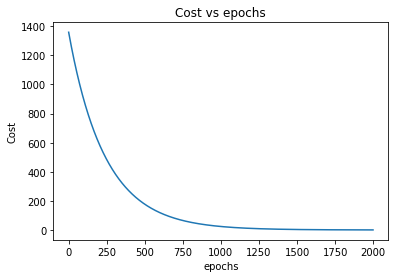

In [272]:
plt.plot(cost_array[0], cost_array[1])
plt.ylabel('Cost')
plt.xlabel('epochs')
plt.title('Cost vs epochs')
plt.show()

In [ ]:
        #gradients = -2/float(len(y)) * sum(X * (y - y_current))
        #params_current = params_current - (learning_rate * gradients)
